In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [39]:

# Load the dataset
file_path = 'star_classification.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset for an initial overview
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [40]:
# Basic descriptive statistics for the dataset
descriptive_stats = data.describe()

# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Correlation analysis
correlation_matrix = data.corr()

# Class distribution
class_distribution = data['class'].value_counts()

# Prepare the analysis results
analysis_results = {
    "Descriptive Statistics": descriptive_stats,
    "Missing Values": missing_values,
    "Correlation Matrix": correlation_matrix,
    "Class Distribution": class_distribution
}

analysis_results

<ipython-input-40-9752431d4498>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


{'Descriptive Statistics':              obj_ID          alpha          delta              u  \
 count  1.000000e+05  100000.000000  100000.000000  100000.000000   
 mean   1.237665e+18     177.629117      24.135305      21.980468   
 std    8.438560e+12      96.502241      19.644665      31.769291   
 min    1.237646e+18       0.005528     -18.785328   -9999.000000   
 25%    1.237659e+18     127.518222       5.146771      20.352353   
 50%    1.237663e+18     180.900700      23.645922      22.179135   
 75%    1.237668e+18     233.895005      39.901550      23.687440   
 max    1.237681e+18     359.999810      83.000519      32.781390   
 
                    g              r              i              z  \
 count  100000.000000  100000.000000  100000.000000  100000.000000   
 mean       20.531387      19.645762      19.084854      18.668810   
 std        31.750292       1.854760       1.757895      31.728152   
 min     -9999.000000       9.822070       9.469903   -9999.000000   
 

In [41]:
# Data Preparation
# Replacing -9999 values with NaN and then imputing them
data.replace(-9999, np.nan, inplace=True)
data.fillna(data.mean(), inplace=True)

# Defining features and target
X = data.drop(['class', 'obj_ID', 'spec_obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'plate', 'MJD', 'fiber_ID'], axis=1)
y = data['class']

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

<ipython-input-41-588ec68fe396>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


Accuracy:  0.9775
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     17845
         QSO       0.96      0.92      0.94      5700
        STAR       0.99      1.00      1.00      6455

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.97     30000
weighted avg       0.98      0.98      0.98     30000



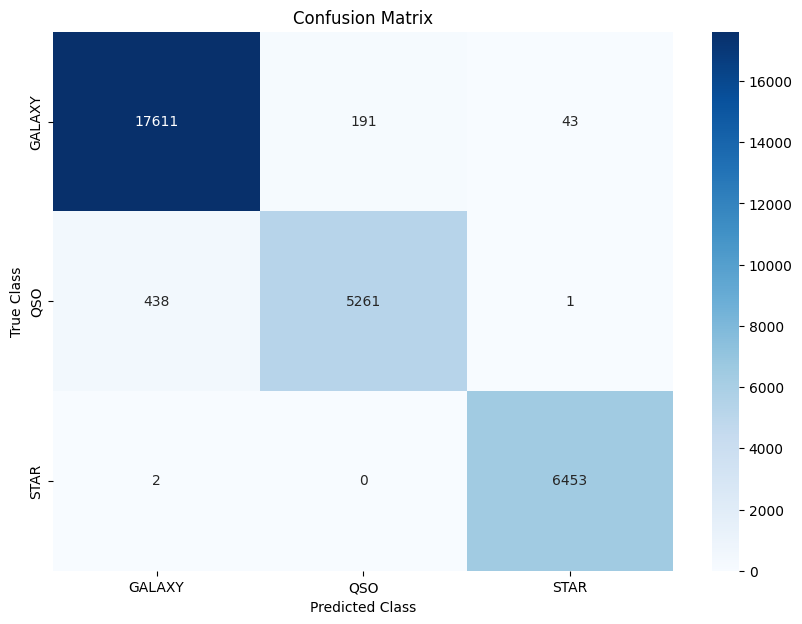

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Encoding the 'class' column
label_encoder = LabelEncoder()
data['class_encoded'] = label_encoder.fit_transform(data['class'])
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Training a Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train_encoded)

# Predicting on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test_encoded, y_pred)
classification_rep = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)

print("Accuracy: ", accuracy)
print(classification_rep)

# Computing the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


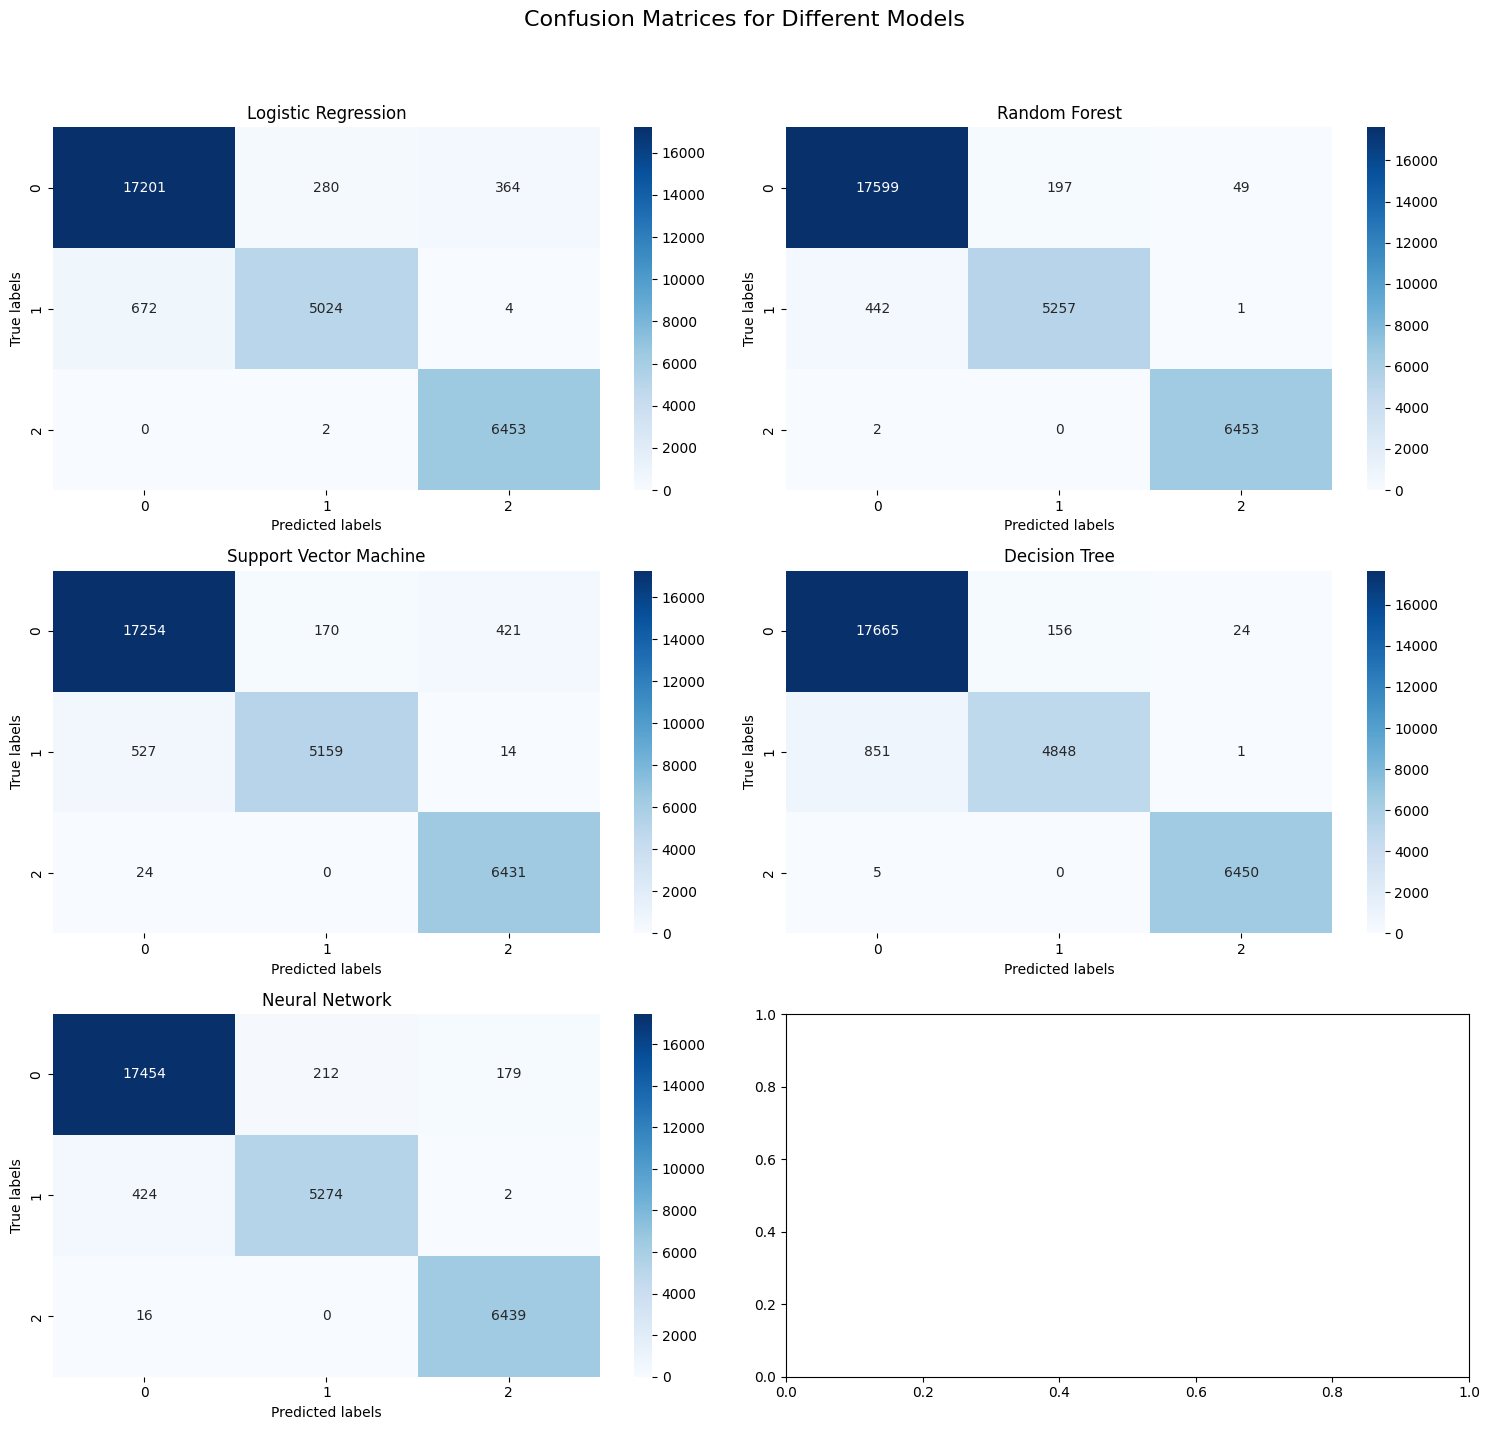

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd

# Simplifying models for quicker training
simplified_models = {
    "Logistic Regression": LogisticRegression(max_iter=100, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5,random_state=42),
    "Neural Network": MLPClassifier(max_iter=100,random_state=42)
}


# Training and evaluating simplified models
model_results = {}
simplified_model_results = {}
for name, model in simplified_models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    simplified_model_results[name] = cm

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Store results
    model_results[name] = {"accuracy": accuracy, "report": report}

# Plotting confusion matrices
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle("Confusion Matrices for Different Models", fontsize=16)
axes = axes.flatten()

for ax, (name, cm) in zip(axes, simplified_model_results.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [32]:
for model, results in model_results.items():
    print(f"Model: {model}")
    print(f"Accuracy: {results['accuracy']:.4f}")
    print("Classification Report:")
    print(results['report'])
    print("\n" + "-"*50 + "\n")

Model: Logistic Regression
Accuracy: 0.9559
Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.96      0.96      0.96     17845
         QSO       0.95      0.88      0.91      5700
        STAR       0.95      1.00      0.97      6455

    accuracy                           0.96     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.96      0.96      0.96     30000


--------------------------------------------------

Model: Random Forest
Accuracy: 0.9770
Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     17845
         QSO       0.96      0.92      0.94      5700
        STAR       0.99      1.00      1.00      6455

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.97     30000
weighted avg       0.98      0.98      0.98     30000


--------------------------------------------------

Mode

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Ensemble Model Accuracy:  0.9717666666666667
Ensemble Model Classification Report: 
               precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.98     17845
         QSO       0.97      0.91      0.94      5700
        STAR       0.98      1.00      0.99      6455

    accuracy                           0.97     30000
   macro avg       0.97      0.96      0.97     30000
weighted avg       0.97      0.97      0.97     30000



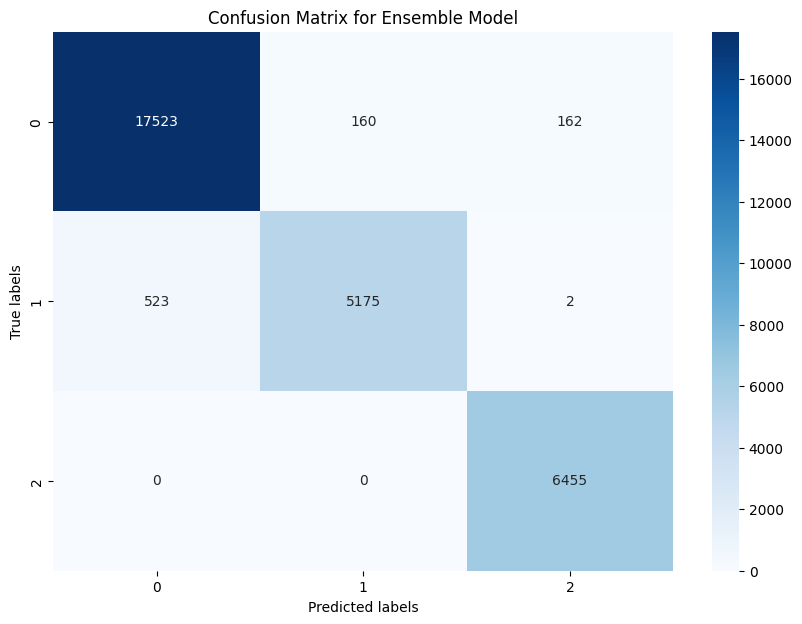

In [46]:
from sklearn.ensemble import VotingClassifier

# Initialize your individual models
lr = LogisticRegression(max_iter=100, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svc = SVC(probability=True, random_state=42)  # Enable probability for SVC
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
nn = MLPClassifier(max_iter=100, random_state=42)

# Create a VotingClassifier with soft voting
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('svc', svc), ('dt', dt), ('nn', nn)],
    voting='soft'
)

# Fit the ensemble model
voting_clf.fit(X_train, y_train)

# Predict on test set
y_pred_ensemble = voting_clf.predict(X_test)

# Compute confusion matrix for the ensemble model
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
report_ensemble = classification_report(y_test, y_pred_ensemble)

# Printing results
print("Ensemble Model Accuracy: ", accuracy_ensemble)
print("Ensemble Model Classification Report: \n", report_ensemble)

# Plotting confusion matrix for the ensemble model
plt.figure(figsize=(10, 7))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Ensemble Model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Ensemble Model Accuracy:  0.9710333333333333
Ensemble Model Classification Report: 
               precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.98     17845
         QSO       0.97      0.91      0.94      5700
        STAR       0.97      1.00      0.99      6455

    accuracy                           0.97     30000
   macro avg       0.97      0.96      0.97     30000
weighted avg       0.97      0.97      0.97     30000



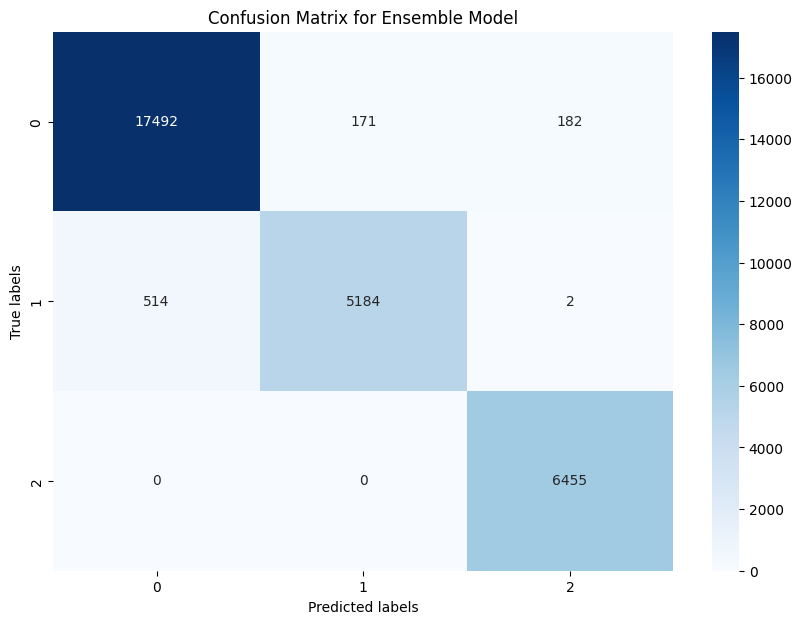

In [47]:
from sklearn.ensemble import VotingClassifier

# Initialize your individual models
lr = LogisticRegression(max_iter=100, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svc = SVC(probability=True, random_state=42)  # Enable probability for SVC
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
nn = MLPClassifier(max_iter=100, random_state=42)

# Create a VotingClassifier with soft voting
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('svc', svc), ('dt', dt), ('nn', nn)],
    voting='hard'
)

# Fit the ensemble model
voting_clf.fit(X_train, y_train)

# Predict on test set
y_pred_ensemble = voting_clf.predict(X_test)

# Compute confusion matrix for the ensemble model
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
report_ensemble = classification_report(y_test, y_pred_ensemble)

# Printing results
print("Ensemble Model Accuracy: ", accuracy_ensemble)
print("Ensemble Model Classification Report: \n", report_ensemble)

# Plotting confusion matrix for the ensemble model
plt.figure(figsize=(10, 7))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Ensemble Model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
